In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

### Rain

In [157]:
rain = pd.read_csv('rainfall.csv')
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [158]:
rain.shape

(6727, 3)

In [159]:
rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


Come possiamo vedere, il dataset `rain` ha 3 feature:
- `Area`, che contiene il nome dello stato.
- `Year`, che indica l'anno in cui sono stati raccolti i dati.
- `average_rain_fall_mm_per_year`, che indica la quantità media di pioggia caduta in millimetri, in un determinato anno e in un determinato paese.

Inoltre, le feature `Area` e `average_rain_fall_mm_per_year` vengono memorizzate come `object`. Questo succede poichè nel leggere i dati, Pandas converte di deafult in object tutti i tipi che non sono interi.Dunque, cambiamo il tipo di `Area` in `String`, ed il tipo di `average_rain_fall_mm_per_year` in `Float`.

In [160]:
rain.describe()

,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000


Notiamo che il dataset, per ogni `Area`, contiene dati dal 1985 al 2017.

In [161]:
rain['average_rain_fall_mm_per_year'] = pd.to_numeric(rain['average_rain_fall_mm_per_year'],errors = 'coerce')
rain[' Area'] = rain[' Area'].astype(pd.StringDtype())
rain.rename(columns={' Area': 'Area'}, inplace=True)
rain.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   string 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 157.8 KB


Oltre ad una migliore rappresentazione dei dati, otteniamo anche una dimensione fissa del file di 157.8 KB.

In [162]:
print(f"Numero totale di paesi: {rain['Area'].unique().size}")

Numero totale di paesi: 217


Il dataset contiene 217 paesi in totale.

In [163]:
rain.dropna()
rain.shape

(6727, 3)

Chiamando il metodo `dropna` togliamo tutte le righe contenenti valori null. Osserviamo però che la shape del data frame non è cambiato, quindi non erano presenti righe con valori null.

### Pesticides

In [164]:
pest = pd.read_csv('pesticides.csv')
pest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [165]:
pest.shape

(4349, 7)

In [166]:
pest.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


Il dataset contiene le seguenti features:
- `Domain`, dominio dei dati raccolti. Il dominio sarà lo stesso per tutte le istanze del dataset.
- `Item`, tipologia di prodotto utilizzato. Nel nostro caso sono solo pesticicidi.
- `Area`, nome del paese in questione,
- `Year`, anno in cui sono state raccolte tali informazioni.
- `Unit`, unità di misura(in questo caso tonnellate).
- `Value`, quantità di pesticidi usati in un determinato anno in un determinato paese.

Le feature `Domain`, `Element`, `Item` e `Unit` sono inutili per il nostro modello, perciò le rimuoviamo. Inoltre cambiamo il nome della colonna `Value` in `Value_in_t` per indicare l'unità di misura e rimuoviamo le eventuali righe contenenti valori null.

In [167]:
pest['Area'] = pest['Area'].astype(pd.StringDtype())

In [168]:
pest.dropna()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [169]:
pest.drop(['Domain', 'Item', 'Unit', 'Element'], axis = 1, inplace= True)
pest.rename(columns = {'Value':'pesticides_in_t'}, inplace=True)
pest.head()

,Area,Year,pesticides_in_t
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [170]:
pest.describe()

,Year,pesticides_in_t
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


Come possiamo notare, il dataset contiene dati dal 1990 al 2016.

In [171]:
pest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             4349 non-null   string 
 1   Year             4349 non-null   int64  
 2   pesticides_in_t  4349 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 102.1 KB


In [172]:
pest.shape

(4349, 3)

Eseguendo le operazioni precedenti, siamo riusciti a ridurre la dimensione totale del dataset a 102.1 KB. Il numero di righe non è cambiato dopo aver chiamato il metodo `dropna`, perciò non erano presenti righe con valori null.

In [173]:
print(f"Numero totale di paesi: {pest['Area'].unique().size}")

Numero totale di paesi: 168


Vediamo che il numero di paesi di questo dataset è minore rispetto al dataest `rain`. Dunque, per poter procedere verso il merging dei vari dataset per creare uno solo, bisogna rimuovere da `rain` tutte le righe rigurdanti i paesi non contenuti in `pesticides`.

### Temperature

In [174]:
temp_data = pd.read_csv('temp.csv')
temp_data.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [175]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


La colonna "country" è composta da oggetti, per risparmiare della memoria e rendere più facile il suo utilizzo, tutti i valori vengono trasformati in stringhe

In [176]:
temp_data['country'] = temp_data['country'].astype('string')

In [177]:
temp_data.isna().sum()

year           0
country        0
avg_temp    2547
dtype: int64

In [178]:
temp_data = temp_data.dropna()

In [179]:
temp_data

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
7,1856,Côte D'Ivoire,26.28
8,1857,Côte D'Ivoire,25.17
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [180]:
temp_data = temp_data.drop_duplicates(['country', 'year'])

In [181]:
temp_data.describe()

,year,avg_temp
count,27479.000000,27479.000000
mean,1907.047891,16.241992
std,67.873286,7.984672
min,1743.000000,-12.130000
25%,1860.000000,9.000000
50%,1913.000000,16.400000
75%,1963.000000,24.515000
max,2013.000000,30.420000


In [182]:
print(temp_data[temp_data['avg_temp'] == temp_data['avg_temp'].min()])
print(temp_data[temp_data['avg_temp'] == temp_data['avg_temp'].max()])

      year     country  avg_temp
4416  1815  Kazakhstan    -12.13
       year country  avg_temp
46776  2013   Niger     30.42


Come si può osservare dalla tabella sopra la temperatura minima registrata nel dataset è di -14.3 C in Russia nel 1815 mentre quella massima è di 30.7C in Sudan nel 2010

In [183]:
temp_year_list = temp_data['year'].unique()
temp_country_list = temp_data['country'].unique()
temp_year_list.sort()

In [184]:
temp_avg_temp_per_year = {}
for i in temp_year_list:
    temp = temp_data[temp_data['year']==i]['avg_temp'].mean()
    temp_avg_temp_per_year[i] = temp

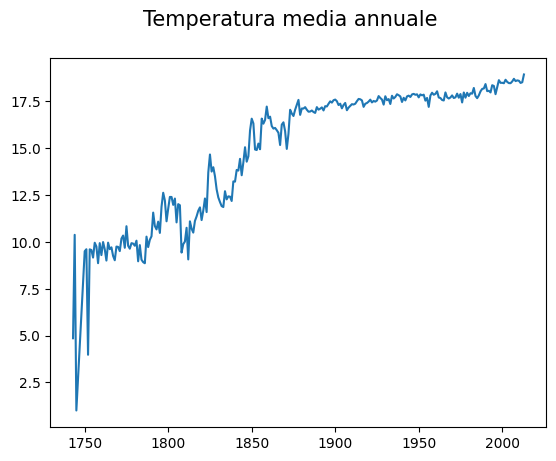

In [185]:
temp_year, temp_avg = zip(*temp_avg_temp_per_year.items())
plt.figure()
plt.suptitle('Temperatura media annuale', fontsize=15)
plt.plot(temp_year, temp_avg)
plt.show()

### Yield

In [186]:
yield_data = pd.read_csv('yield.csv')
yield_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [187]:
yield_data.isna().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [188]:
yield_data.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


Dalla tabella si può osservare che sono presenti stati che non hanno prodotto grano in un determinato anno

Alcune colonne sono ripetitive o non utili ai fini dello studio quindi decido di eliminarle

In [189]:
yield_data = yield_data.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item Code', 'Element Code', 'Element', 'Unit', 'Area Code'])

In [190]:
wheat_yield_data = yield_data[yield_data['Item']=='Wheat']
wheat_yield_data

,Area,Item,Year,Value
168,Afghanistan,Wheat,1961,10220
169,Afghanistan,Wheat,1962,9735
170,Afghanistan,Wheat,1963,8317
171,Afghanistan,Wheat,1964,9510
172,Afghanistan,Wheat,1965,9723
...,...,...,...,...
56712,Zimbabwe,Wheat,2012,24420
56713,Zimbabwe,Wheat,2013,22888
56714,Zimbabwe,Wheat,2014,21357
56715,Zimbabwe,Wheat,2015,19826


Visto che tutte le istanze sono relative al grano, possiamo rimuovere la colonna `Item` poiché ridondante.

In [191]:
wheat_yield_data = wheat_yield_data.drop('Item', axis = 1)
wheat_yield_data['Area'] = wheat_yield_data['Area'].astype(pd.StringDtype())
wheat_yield_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6160 entries, 168 to 56716
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    6160 non-null   string
 1   Year    6160 non-null   int64 
 2   Value   6160 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 192.5 KB


Per il nostro studio è necessario sapere solo la produzione di grano e non di tutti i prodotti del dataset, quindi elimino le righe non utili. Inoltre, cambiamo il nome della feature `Value` in `value_in_hg/ha` per indicare l'unità di misura.

In [192]:
wheat_yield_data.rename(columns = {'Value':'value_in_hg/ha'}, inplace = True)
wheat_yield_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6160 entries, 168 to 56716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            6160 non-null   string
 1   Year            6160 non-null   int64 
 2   value_in_hg/ha  6160 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 192.5 KB


Creo un grafico che rappresenta i 10 paesi con la produzione media in tutto il dataset maggiore

In [193]:
yield_country_list = wheat_yield_data['Area'].unique()
avg_wheat_production_per_country = {}
for i in yield_country_list:
    avg_wheat_production_per_country[i] = wheat_yield_data[wheat_yield_data['Area']==i]['value_in_hg/ha'].mean()

In [194]:
avg_wheat_production_per_country = sorted(avg_wheat_production_per_country.items(), key=lambda kv: kv[1], reverse=True)
avg_wheat_production_per_country = avg_wheat_production_per_country[:10]

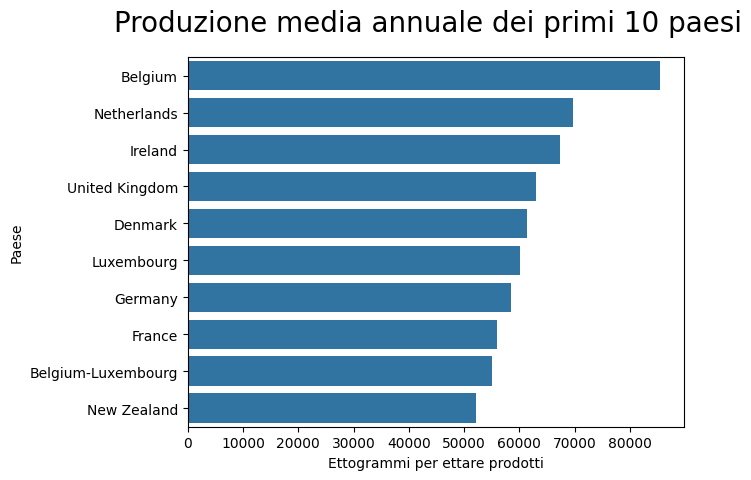

In [195]:
area, value = zip(*avg_wheat_production_per_country)
plt.figure()
plt.suptitle('Produzione media annuale dei primi 10 paesi', fontsize=20)
sns.barplot(y = area, x = value)
plt.xlabel('Ettogrammi per ettare prodotti')
plt.ylabel('Paese')
plt.show()

Nel seguente grafico rappresentiamo invece la media mondiale di produzione di grano per ogni anno

In [196]:
avg_production_per_year_dict = {}
yield_year_list = yield_data['Year'].unique()
yield_year_list.sort()
for i in yield_year_list:
    avg_production_per_year_dict[i] = yield_data[yield_data['Year']==i]['value_in_hg/ha'].mean()

KeyError: 'value_in_hg/ha'

In [ ]:
years, prod = zip(*avg_production_per_year_dict.items())
plt.figure()
plt.suptitle('Produzione mondiale media di grano per anno', fontsize=20)
sns.lineplot(y = prod, x = years)
plt.show()

In [214]:
temp_data.rename(columns = {'country':'Area'}, inplace = True)
temp_data.rename(columns = {'year':'Year'}, inplace = True)
temp_yield_data = pd.merge(temp_data, wheat_yield_data, on=['Year','Area'])
pest_rain_data = pd.merge(rain,pest, on=['Year','Area'])
data = pd.merge(temp_yield_data, pest_rain_data,  on=['Year','Area'])


C:\Users\aedua\AppData\Local\Temp\ipykernel_27336\1928578816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data.rename(columns = {'country':'Area'}, inplace = True)
C:\Users\aedua\AppData\Local\Temp\ipykernel_27336\1928578816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data.rename(columns = {'year':'Year'}, inplace = True)


In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data['Area'].unique().size

Vediamo che, dopo il merge, ci restano i dati realtivi soltanto a 82 stati. Questo è dovuto al fatto che alcuni stati non sono presenti in cerit dataset. Di seguito, anche la lista degli stati presenti nel dataset finale ottenuto:

In [ ]:
data['Area'].unique()

In [ ]:
data['value_in_hg/ha'].describe()

In [ ]:
years = data['Year'].unique()

plt.figure()
plt.suptitle('Produzione media annuale dei primi 10 paesi', fontsize=15)

plt.xlabel('Ettogrammi per ettare prodotti')
plt.ylabel('Paese')
plt.show()

Di seguito creiamo una funzione che mostra i dati (yield, pioggia, temperatura, pesticidi) di un paese specifico. L'obiettivo è quello di capire se ci sia qualche correlazione tra le feature.

In [ ]:
def show_data_of_country(data, country):
    data_of_country = data[data["Area"] == country]
    years = data_of_country['Year']
    rain = data_of_country['average_rain_fall_mm_per_year']
    temp = data_of_country['avg_temp']
    _yield = data_of_country['value_in_hg/ha']
    pest = data_of_country['pesticides_in_t']
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    
    # Pioggia
    axes[0, 0].plot(years, rain, marker='o', linestyle='-', color='b')
    axes[0, 0].set_title(f"Average Rainfall for {country}")
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Average Rainfall (mm)')
    axes[0, 0].grid(True)

    # Temperatura
    axes[0, 1].plot(years, temp, marker='o', linestyle='-', color='r')
    axes[0, 1].set_title(f"Average Temperature for {country}")
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Average Temperature (°C)')
    axes[0, 1].grid(True)

    #  Yield
    axes[1, 0].plot(years, _yield, marker='o', linestyle='-', color='g')
    axes[1, 0].set_title(f"Crop Yield for {country}")
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Yield (hg/ha)')
    axes[1, 0].grid(True)

    #  Pesticidi
    axes[1, 1].plot(years, pest, marker='o', linestyle='-', color='m')
    axes[1, 1].set_title(f"Pesticides Usage for {country}")
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Pesticides (t)')
    axes[1, 1].grid(True)

    plt.tight_layout()
    
    
    plt.show()
    

In [ ]:
show_data_of_country(data, 'Belgium')
show_data_of_country(data, 'Germany')
show_data_of_country(data, 'Zimbabwe')

La funzione `show_data_of_country` prende come argomento il nome del paese che vogliamo esaminare e il frame contenente i dati. La funzione genera 4 grafici diversi, ognuno dei quali ha lungo l'asse x la lista degli anni per cui esistono osservazioni. Il primo grafico indica la quantità media di pioggia caduta negli anni, il secondo grafico indica la temperatura media negli anni, il terzo indica lo yield(raccolta) negli anni e l'ultimo indica l'utilizzo dei pesticidi(in tonnellate) negli anni.

Di sopra possiamo vedere i grafici relativi a 3 paesi: Germania, Belgio e Zimbabwe. Come possiamo notare, dai grafici risulta difficile trovare qualche correlazione tra le feature.

In [ ]:
def show_global_data(data):
    years = data['Year'].unique()
    grouped_data = data.groupby('Year')
    global_rain = grouped_data['average_rain_fall_mm_per_year'].mean()
    global_pest = grouped_data['pesticides_in_t'].mean()
    global_temp = grouped_data['avg_temp'].mean()
    global_yield = grouped_data['value_in_hg/ha'].mean()
    
    # Create a figure and axes with 2x2 subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    
    # First subplot: Rainfall
    axes[0, 0].plot(years, global_rain, marker='o', linestyle='-', color='b')
    axes[0, 0].set_title("Global Average Rainfall")
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Average Rainfall (mm)')
    axes[0, 0].grid(True)

    # Second subplot: Temperature
    axes[0, 1].plot(years, global_temp, marker='o', linestyle='-', color='r')
    axes[0, 1].set_title("Global Average Temperature")
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Average Temperature (°C)')
    axes[0, 1].grid(True)

    # Third subplot: Yield
    axes[1, 0].plot(years, global_yield, marker='o', linestyle='-', color='g')
    axes[1, 0].set_title("Global Crop Yield")
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Yield (hg/ha)')
    axes[1, 0].grid(True)

    # Fourth subplot: Pesticides
    axes[1, 1].plot(years, global_pest, marker='o', linestyle='-', color='m')
    axes[1, 1].set_title("Global Pesticides Usage")
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Pesticides (t)')
    axes[1, 1].grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [ ]:
show_global_data(data)

Abbiamo definito anche un'altra funzione, chiamata `show_global_data`, la quale mostra le stesse informazioni di `show_data_of_country` però a scala globale. Osservando i grafici, in particolare il grafico dello yield e dei pesticidi, possiamo notare che sembra esserci una correlazione tra la produzione del grano e la quantità dei pesticidi utilizzati. Infatti, sembra che lo yield aumenti con l'aumentare dell' utilizzo dei pesticidi. Infatti, l'utilizzo dei pesticidi aumenta lo yield, proteggendo il grano da insetti o malattie che potrebbero danneggiarne la coltivazione.

Vogliamo aggiungere nuove features, considerando ad esempio lo yield medio di un determinato paese negli anni, oppure la quantità media di pesticidi usati in passato. Dunque, aggiungiamo nuove colonne al dataset:

In [215]:
def create_new_features(data, year):
    new_features_by_country = {}
    
    # Itera per ogni paese unico
    for country in data['Area'].unique():
        country_data = data[data['Area'] == country]
        country_data_filtered = country_data[country_data['Year'] < year]
        
        # Inizializza un dizionario per le caratteristiche del paese corrente
        new_features = {}
        
        # Calcola le caratteristiche per ogni colonna tranne 'Area' e 'Year'
        for column in country_data_filtered.columns:
            if column not in ['Area', 'Year']:
                feature_name = f'{column}_'
                feature_data = country_data_filtered[column]
                new_features[feature_name + 'mean'] = feature_data.mean()
                new_features[feature_name + 'std'] = feature_data.std()
                new_features[feature_name + 'variation'] = feature_data.max() - feature_data.min()
        
        # Aggiungi le caratteristiche calcolate per il paese corrente al dizionario principale
        new_features_by_country[country] = new_features
    
    return new_features_by_country

In [216]:
features = create_new_features(data,2013)

In [218]:
#features

Abbiamo deciso di aggiungere ulteriori features, derivate da quelle già presenti. In particolare, ci sembra interessante come il modello potrebbe giovare dal conoscere lo yield precedente ad

In [226]:
def add_lagged_features(df, lag=1):
    # Lista delle colonne per cui vogliamo aggiungere le feature lag
    columns_to_lag = ['value_in_hg/ha']
    
    # Ciclo attraverso ogni colonna per creare le versioni ritardate (lagged)
    for column in columns_to_lag:
        for i in range(1, lag + 1):
            df[f'{column}_lag_{i}'] = df.groupby('Area')[column].shift(i)
    
    return df

# Supponiamo di avere un dataframe chiamato "data"
# Esegui la funzione per aggiungere le feature lag
data_with_lags = add_lagged_features(data, lag=5)

In [227]:
data_with_lags.head()

,Year,Area,avg_temp,value_in_hg/ha,average_rain_fall_mm_per_year,pesticides_in_t,value_in_hg/ha_lag_1,value_in_hg/ha_lag_2,value_in_hg/ha_lag_3,value_in_hg/ha_lag_4,value_in_hg/ha_lag_5
0,1990,Turkey,19.22,21227,593.0,29918.0,NaN,NaN,NaN,NaN,NaN
1,1991,Turkey,18.94,21288,593.0,24343.0,21227.0,NaN,NaN,NaN,NaN
2,1992,Turkey,17.68,20405,593.0,27110.0,21288.0,21227.0,NaN,NaN,NaN
3,1993,Turkey,18.82,21642,593.0,28042.0,20405.0,21288.0,21227.0,NaN,NaN
4,1994,Turkey,19.76,17975,593.0,24219.0,21642.0,20405.0,21288.0,21227.0,NaN


In [228]:
data_with_lags.shape

(1810, 11)

In [232]:
data_with_lags = data_with_lags.dropna()
data_with_lags.shape

(1403, 11)

In [233]:
data_with_lags.head()

,Year,Area,avg_temp,value_in_hg/ha,average_rain_fall_mm_per_year,pesticides_in_t,value_in_hg/ha_lag_1,value_in_hg/ha_lag_2,value_in_hg/ha_lag_3,value_in_hg/ha_lag_4,value_in_hg/ha_lag_5
5,1995,Turkey,19.15,19315,593.0,27328.0,17975.0,21642.0,20405.0,21288.0,21227.0
6,1996,Turkey,19.47,19852,593.0,30286.0,19315.0,17975.0,21642.0,20405.0,21288.0
7,1997,Turkey,18.65,20174,593.0,34431.0,19852.0,19315.0,17975.0,21642.0,20405.0
8,1998,Turkey,19.92,22564,593.0,30162.0,20174.0,19852.0,19315.0,17975.0,21642.0
9,1999,Turkey,20.02,19409,593.0,33089.0,22564.0,20174.0,19852.0,19315.0,17975.0


In [267]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

"""
# Supponiamo di avere un dataframe "data_with_lags"
# Definisci le colonne di input e l'etichetta (target)
input_columns = [col for col in data_with_lags.columns if col not in ['Year', 'value_in_hg/ha']]
target_column = 'value_in_hg/ha'
input_columns
# Seleziona le features e il target
X = data_with_lags[input_columns]
y = data_with_lags[target_column]
X
"""

'\n# Supponiamo di avere un dataframe "data_with_lags"\n# Definisci le colonne di input e l\'etichetta (target)\ninput_columns = [col for col in data_with_lags.columns if col not in [\'Year\', \'value_in_hg/ha\']]\ntarget_column = \'value_in_hg/ha\'\ninput_columns\n# Seleziona le features e il target\nX = data_with_lags[input_columns]\ny = data_with_lags[target_column]\nX\n'

In [293]:
data_hot = pd.get_dummies(data, columns = ['Area'], prefix = ['Country'])
X = data_hot.loc[:,data_hot.columns != 'value_in_hg/ha']
y = data_hot['value_in_hg/ha']
X = X.drop(['Year'], axis = 1)
X.head()

,avg_temp,average_rain_fall_mm_per_year,pesticides_in_t,value_in_hg/ha_lag_1,value_in_hg/ha_lag_2,value_in_hg/ha_lag_3,value_in_hg/ha_lag_4,value_in_hg/ha_lag_5,Country_Albania,Country_Algeria,...,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe
0,19.22,593.0,29918.0,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,True,False,False,False,False,False,False
1,18.94,593.0,24343.0,21227.0,NaN,NaN,NaN,NaN,False,False,...,False,False,False,True,False,False,False,False,False,False
2,17.68,593.0,27110.0,21288.0,21227.0,NaN,NaN,NaN,False,False,...,False,False,False,True,False,False,False,False,False,False
3,18.82,593.0,28042.0,20405.0,21288.0,21227.0,NaN,NaN,False,False,...,False,False,False,True,False,False,False,False,False,False
4,19.76,593.0,24219.0,21642.0,20405.0,21288.0,21227.0,NaN,False,False,...,False,False,False,True,False,False,False,False,False,False


In [280]:
y

5       19315
6       19852
7       20174
8       22564
9       19409
        ...  
1805    51896
1806    40415
1807    52237
1808    53473
1809    48846
Name: value_in_hg/ha, Length: 1403, dtype: int64

In [294]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.61538462, 0.16995923, 0.08134724, ..., 0.        , 0.        ,
        0.        ],
       [0.60576923, 0.16995923, 0.06618862, ..., 0.        , 0.        ,
        0.        ],
       [0.5625    , 0.16995923, 0.07371219, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33379121, 0.33301976, 0.00445497, ..., 0.        , 0.        ,
        0.        ],
       [0.33722527, 0.33301976, 0.00472342, ..., 0.        , 0.        ,
        0.        ],
       [0.35302198, 0.33301976, 0.0049919 , ..., 0.        , 0.        ,
        0.        ]])

In [295]:
from sklearn.model_selection import train_test_split
train_data,test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [250]:
model.coef_

array([-2.89807218e+01, -1.57355692e-01,  3.31151319e-03,  3.11664341e-01,
        2.06837247e-01,  2.19451895e-01,  1.61592648e-01,  9.84064674e-02])

In [296]:
model = LinearRegression()
model.fit(train_data, train_labels)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [288]:
model.score(test_data, test_labels)

0.9529120889931264

In [291]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = mean_absolute_percentage_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"   Mean squared error: {mse:.5}")
    print(f"       Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

In [292]:

print_eval(test_data, test_labels, model)

   Mean squared error: 2.1088e+07
       Relative error: 13.63447%
R-squared coefficient: 0.95291


In [252]:
def plot_model_on_data(X, y, model=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(X, y)
    if model is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        line_x = np.linspace(xlim[0], xlim[1], 100)
        line_x_df = pd.DataFrame(line_x[:, None], columns=X.columns)
        line_y = model.predict(line_x_df)
        plt.plot(line_x, line_y, c="red", lw=3)
        plt.xlim(xlim); plt.ylim(ylim)
    plt.grid()
    plt.xlabel("Temperatura (°C)"); plt.ylabel("Consumi (GW)")